Plot the grillmair styx track with my simulated stream particles, to compare the model trajectory with the data

In [1]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics
import pandas as pd

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [2]:
import pandas as pd
styx_radec = pd.read_csv(r"styx_radec.csv")
styx_trace = pd.read_csv(r"styx_trace.csv")

In [3]:
styx_ra = styx_radec.ra.to_list()
styx_dec = styx_radec.dec.to_list()

styx_tra = styx_trace.ra.to_list()
styx_tdec = styx_trace.dec.to_list()

In [4]:
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)
tdisrupt=5

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

pot14 = graphics.lmc_potential_wacc(tdisrupt, pot=MWPotential2014)

In [5]:
# Integrate orbit of Boo3
ts = np.linspace(0,-(tdisrupt/3)/to,1000)
o.integrate(ts, pot=pot14)

In [6]:
import pickle
filehandler = open('lmc_stream_models_N500.obj', 'rb') 
obj = pickle.load(filehandler)

oall_lmc16 = obj.get("MW14 1E6")
oall_lmc56 = obj.get("MW14 5E6")
oall_lmc17 = obj.get("MW14 1E7")
oall_lmc57 = obj.get("MW14 5E7")

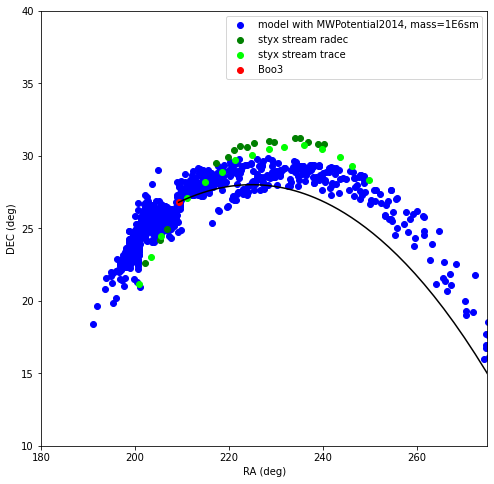

In [7]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc16.ra(), oall_lmc16.dec(), label='model with MWPotential2014, mass=1E6sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

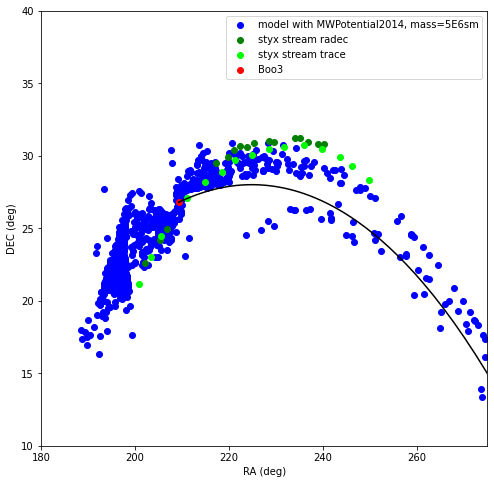

In [8]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc56.ra(), oall_lmc56.dec(), label='model with MWPotential2014, mass=5E6sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

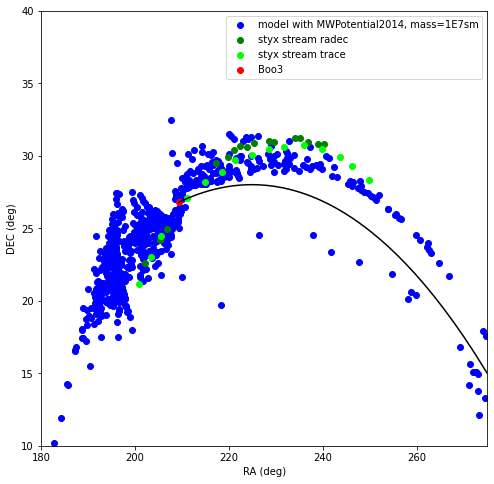

In [9]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc17.ra(), oall_lmc17.dec(), label='model with MWPotential2014, mass=1E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

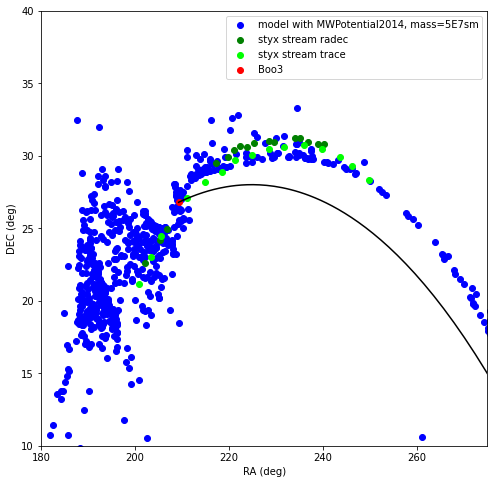

In [10]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc57.ra(), oall_lmc57.dec(), label='model with MWPotential2014, mass=5E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

## Model without the inclusion of LMC in the potential

In [12]:
ot = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
ot.turn_physical_off()
mass = 1e6
tdisrupt = 5

oall, oleading, otrailing, dtall, dt, dtt = graphics.streamorbits(mass, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [13]:
ts = np.linspace(0,-(tdisrupt/3)/to,1000)
ot.integrate(ts, pot=MWPotential2014)

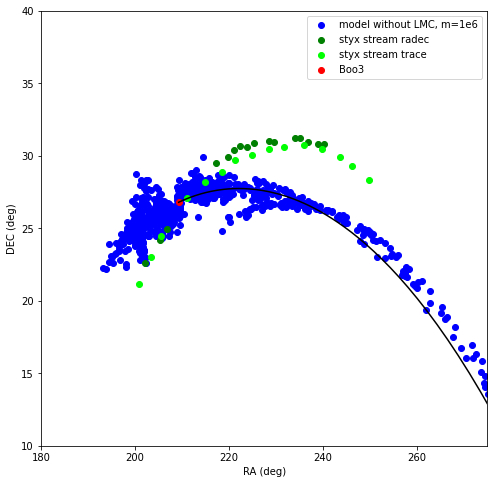

In [14]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall.ra(), oall.dec(), label='model without LMC, m=1e6', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(ot.ra(),ot.dec(),label='Boo3', c='red')
plt.plot(ot.ra(ts), ot.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

In [16]:
oall2, oleading2, otrailing2, dtall2, dt2, dtt2 = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

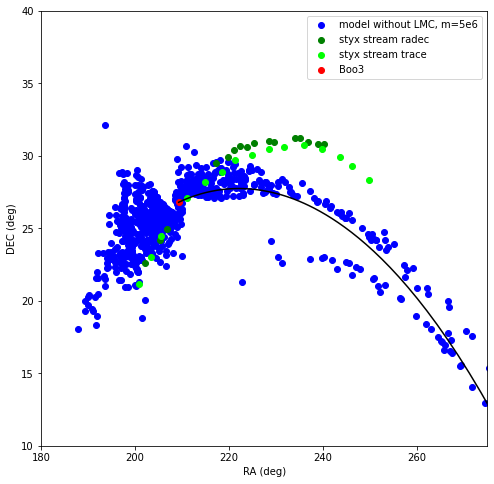

In [17]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall2.ra(), oall2.dec(), label='model without LMC, m=5e6', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(ot.ra(),ot.dec(),label='Boo3', c='red')
plt.plot(ot.ra(ts), ot.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

## Just comparing the two orbits overlapped:

(10.0, 40.0)

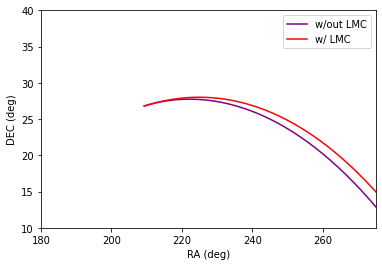

In [37]:
plt.plot(ot.ra(ts), ot.dec(ts), c='purple', label='w/out LMC')
plt.plot(o.ra(ts), o.dec(ts), c='red', label='w/ LMC')

plt.legend()
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.xlim(180,275)
plt.ylim(10,40)

## Double checking for errors: (TRY RUNNING FROM SCRATCH)

In [1]:
>>> import numpy
>>> from astropy import units
>>> from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce
>>> from galpy.orbit import Orbit
>>> olmc= Orbit.from_name('LMC')
#>>> MWPotential2014[2]*= 1.5 # Don't run this if you've already run it before in the session
>>> cdf= ChandrasekharDynamicalFrictionForce(GMs=10.**11.*units.Msun,rhm=5.*units.kpc,
                                             dens=MWPotential2014)
>>> ts= numpy.linspace(0.,-10.,1001)*units.Gyr
>>> olmc.integrate(ts,MWPotential2014+cdf)

In [2]:
>>> from galpy.potential import HernquistPotential, MovingObjectPotential
>>> lmcpot= HernquistPotential(amp=2*10.**11.*units.Msun,
                               a=5.*units.kpc/(1.+numpy.sqrt(2.))) #rhm = (1+sqrt(2)) a
>>> moving_lmcpot= MovingObjectPotential(olmc,pot=lmcpot)

In [3]:
>>> from galpy.potential import (evaluateRforces, evaluatephitorques,
                                 evaluatezforces)
>>> loc_origin= 1e-4 # Small offset in R to avoid numerical issues
>>> ax= lambda t: evaluateRforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)
>>> ay= lambda t: evaluatephitorques(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                    use_physical=False)/loc_origin
>>> az= lambda t: evaluatezforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)

In [4]:
>>> t_intunits= olmc.time(use_physical=False)[::-1] # need to reverse the order for interp
>>> ax4int= numpy.array([ax(t) for t in t_intunits])
>>> ax_int= lambda t: numpy.interp(t,t_intunits,ax4int)
>>> ay4int= numpy.array([ay(t) for t in t_intunits])
>>> ay_int= lambda t: numpy.interp(t,t_intunits,ay4int)
>>> az4int= numpy.array([az(t) for t in t_intunits])
>>> az_int= lambda t: numpy.interp(t,t_intunits,az4int)

In [5]:
>>> from galpy.potential import NonInertialFrameForce
>>> nip= NonInertialFrameForce(a0=[ax_int,ay_int,az_int])

In [6]:
from galpy.util import conversion
ro = 8
vo = 220
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)
tdisrupt=5

In [12]:
sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]

otest = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
otest.turn_physical_off()

In [13]:
total_pot = [MWPotential2014] + [nip] + [moving_lmcpot]

In [16]:
from streamtools.df import streamspraydf

mass = 1e7
spdf_lmc= streamspraydf(mass/mo,
    progenitor=otest,
    pot=total_pot,
    tdisrupt=tdisrupt/to,
    rtpot=MWPotential2014)
#Distribution function for the trailing tail
spdft_lmc= streamspraydf(mass/mo,
    progenitor=otest,
    pot=total_pot,
    tdisrupt=tdisrupt/to,
    rtpot=MWPotential2014,
    leading=False)


/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [17]:
RvR_lmc,dt_lmc= spdf_lmc.sample(n=100,returndt=True,integrate=True)
RvRt_lmc,dtt_lmc= spdft_lmc.sample(n=100,returndt=True,integrate=True)

In [19]:
import numpy as np

vxvva_lmc=np.column_stack([np.append(RvR_lmc[0],RvRt_lmc[0]),
    np.append(RvR_lmc[1],RvRt_lmc[1]),
    np.append(RvR_lmc[2],RvRt_lmc[2]),
    np.append(RvR_lmc[3],RvRt_lmc[3]),
    np.append(RvR_lmc[4],RvRt_lmc[4]),
    np.append(RvR_lmc[5],RvRt_lmc[5])])
oall_test=Orbit(vxvva_lmc,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
dtall_test=np.append(dt_lmc,dtt_lmc)

In [20]:
ts = np.linspace(0,-(tdisrupt/3)/to,1000)
otest.integrate(ts, pot=total_pot)

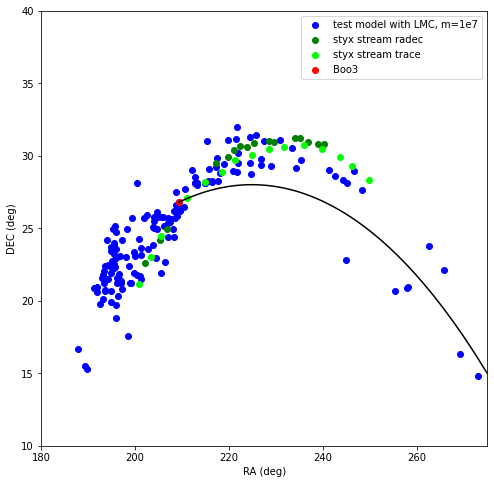

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

plt.scatter(oall_test.ra(), oall_test.dec(), label='test model with LMC, m=1e7', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(otest.ra(),otest.dec(),label='Boo3', c='red')
plt.plot(otest.ra(ts), otest.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

Confirmed: LMC contribution produces stream offset from orbit.